In [3]:
import sys
sys.path.insert(0, "C:/Users/mikea/OneDrive/Documents/byu_math_510/code/src")

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from factorizations.householder import house, formQ
from utils import vandermonde

# Problem 12.2
In Example 11.1 we remarked that polynomial interpolation in equispaced points is ill-conditioned. To illustrate this phenomenon, let $x_1, x_2, \dots, ... , x_n$ and $y_1, y_2, \dots, y_m$ be $n$ and $m$ equispaced pointsfrom $-1$ to $1$, respectively.

**(a)** Derive a formula for the $m \times n$ matrix $A$ that maps an $n$-vector of data at $\{x_j\}$ to an $m$-vector of sampled values $\{y_j\}$, where $p$ is the degree $n-1$ polynomial interpolant of the data (i.e., the Vandermonde matrix). 

**Solution:** As given in the problem statement, let $x_1, x_2, \dots, ... , x_n$ and $y_1, y_2, \dots, y_m$ be $n$ and $m$ equispaced pointsfrom $-1$ to $1$. Form the vectors $x = \begin{bmatrix} x_1 \\ \vdots \\ x_n \end{bmatrix}$ and $y = \begin{bmatrix} y_1 \\ \vdots \\ y_m \end{bmatrix}$ from those equally spaced points. Let $V_x$ be the $n \times n$ Vandermonde matrix for $x$ and $V_y$ be the $m \times n$ Vandermonde matrix for $y$. We seek an $m \times n$ matrix $A$ such that $Af(x) = p(y)$. To this end, consider $V_x c = f(x)$ for a vector of constants, $c$. Then $c = V_x^{-1} f(x)$, since a square Vandermonde matrix is invertible. But this means that taking $V_yV_x^{-1}f(x) = V_y c = p(y)$. Let $A = V_yV_x^{-1} = A$. Then we have $A f(x) = p(y)$, as desired.


**(b)** Write a program to calculate $A$ and plot $\begin{Vmatrix} A \end{Vmatrix}_\infty$ on a semilog scale for $n=1, 2, \dots, 30$, $m = 2n-1$. In the continuous limit $m \to \infty$, the numbers $\begin{Vmatrix} A \end{Vmatrix}_\infty$ are known as the *Lebesgue constant* for equispaced interpolation, which are asymptotic to $2^n/(e(n-1)\log n)$ as $n \to \infty$. 

In [4]:
def interp_x_to_y(x, y):
    """Given a mesh defined by x_1, ... , x_n, transform points on the degree n-1 polynomial p(x_j) to points p(y_j) under the mesh defined by y_1, ... , y_m. That is, solve Ax = Vy for A.

    Args:
        x (arr): n equally spaced points
        y (arr): m equally spaced points
    """
    # Construct Vandermonde for y
    Vm = vandermonde(y, len(x))

    # Construct Vandermonde for x
    Vn = vandermonde(x, len(x))

    # Compute Vn inverse
    Vn_inv = np.linalg.inv(Vn)
    
    # Compute A
    A = Vm @ Vn_inv

    return A


    

In [23]:
def vandermonde(x, n):
    """A Vandermonde matrix V of size len(x) x len(x)

    Args:
        x (arr): A vector x of data from which the Vandermonde matrix is to be constructed.
        n (int): Degree of the polynomial represented by V
    """
    # m = len(x) # Number of rows for V
    
    # Construct Vandermonde of data x
    V = np.array([x**k for k in range(n)]).T

    # Return Vandermonde
    return V
vandermonde(y[10], 5).shape

(21, 5)

In [24]:
# Compute infinity norms for matrices A_k of dimension n = 1, 2, ... , 30, m = 2n-1, where the matrices Ak are defined by the mesh_transform
x = [np.linspace(-1, 1, n) for n in range(1, 31)]
y = [np.linspace(-1, 1, 2*n - 1) for n in range(1, 31)]
Ak = [interp_x_to_y(x[i], y[i]) for i in range(30)]


In [25]:
# Compute the infinity norm for each A_n
Ak_inf_norm = [np.linalg.norm(A, ord=np.inf) for A in Ak]

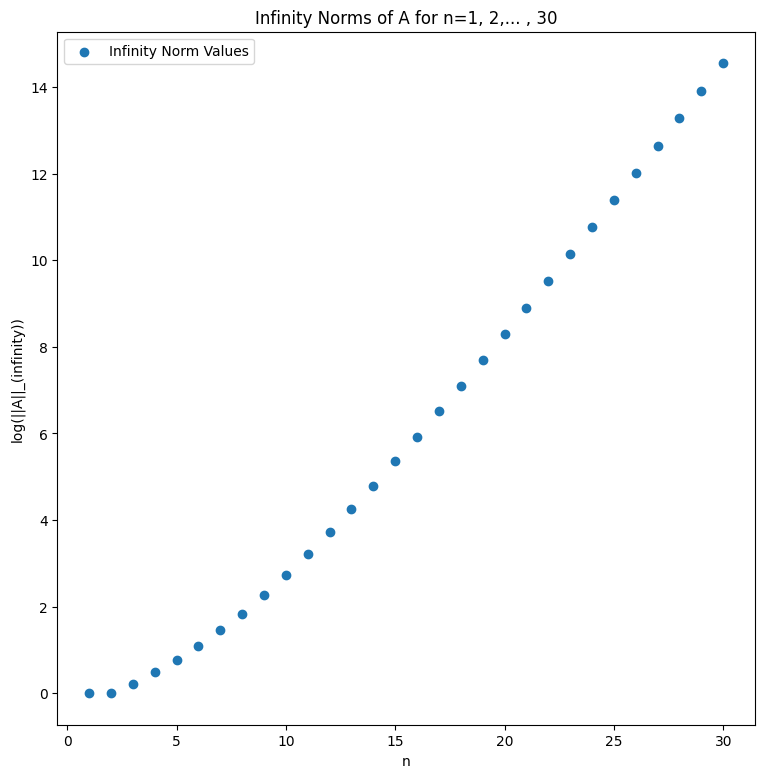

In [28]:
# Plot Lebesgue constants of the A_n's on a semi-log scale
fig = plt.figure(figsize=(9, 9))
plt.scatter(np.arange(1, 31), np.log(Ak_inf_norm), label="Infinity Norm Values")
# plt.axhline(np.log((2 ** 30)/(np.e * (30-1) * np.log(30))))
plt.legend()
plt.xlabel("n")
plt.ylabel("log(||A||_(infinity))")
plt.title("Infinity Norms of A for n=1, 2,... , 30")
plt.show()

**(c)** For $n = 1, 2, \dots , 30$ and $m = 2n-1$, what is the $\infty$-norm condition number $\kappa$ of the problem of interpolating the constant function $1$? Use $(12.6)$.

**Solution:** To compute the condition number of the problem of interpolating the constant function 1, we first define the problem as the function $g$ such that $g(f(x)) = p(y) = 1$, where $g = A$, the $m \times n$ matrix transforming data to interpolated points on the constant function 1, in other words, the problem is $A: f(x) \to p(y)$. Since $A$ is linear, the Jacobian $J(A) = A$. Then we have $\begin{Vmatrix} f(x) \end{Vmatrix}_\infty = 1$ by definition and $\begin{Vmatrix} p(y) \end{Vmatrix}_\infty = 1$ because we are interpolating the constant function 1. Thus $$ \kappa = \frac{\begin{Vmatrix} J(A) \end{Vmatrix}_\infty}{\begin{Vmatrix} p(y) \end{Vmatrix}_\infty/\begin{Vmatrix} f(x) \end{Vmatrix}_\infty} =  \begin{Vmatrix} A \end{Vmatrix}_\infty,$$ which `blows up' with the dimension of $A$ as seen in the plot in Part (b).

**(d)** How close is your result for $n = 11$ to the bound implicit in Figure $11.1$?

In [ ]:
# My code for building the Vandermonde matrix, which I've stored in a utility functions file elsewhere
# def vandermonde(x):
#     """A Vandermonde matrix of size len(x) x len(x)

#     Args:
#         x (arr): A vector x of data from which the Vandermonde matrix is to be constructed.
#     """
#     n = len(x)
    
#     # Construct Vandermonde of data x
#     V = np.array([[x**k for k in range(n)]])

#     # Return Vandermonde
#     return V

# 12.3
The goal of this problem is to explore some properties of random matrices. Your job is to be a laboratory scientist, perfomring experiments that lead to conjectures and more refined experiments. Do not try to prove anything. Do produce well-designed plots, which are worth a thousand numbers.

Define a _random matrix_ to be an $m \times m$ matrix whose entries are independent samples from the real nomral distrubution with mean zero and standard deviation $m^{1/2}$. The factor $\sqrt{m}$ is introduced to make the limiting behavior clean as $m \to \infty$.

**(a)** What do the eigenvalues of a random matrix look like? What happens, say, if you take 100 random matrices and superimpose all their eigenvalues in a single plot? If you do this for m = 8, 16, 32, 64, ... , what pattern is suggested? How does the spectral radius $\rho(A)$ (Exercise 3.2) behave as $m \to \infty$?

In [93]:
# Get a list of powers of two for which 100 random matrices each will be produced.
powers_of_two = [2 ** (k + 3) for k in range(6)]

In [94]:
def rand_mats_100(m):
    # Output 100 random matrices of dim m x m
    return [np.random.normal(loc=0.0, scale=1/np.sqrt(m), size=(m, m)) for i in range(100)]

In [95]:
# compute the eigen-values for 100 random matrices each for matrix sizes 8, 16, 32, 64, 128, 256 and
# format the results into x and y vectors for plotting for plotting
rand_eigs_dict = {idx: np.linalg.eigvals(rand_mats_100(idx)).flatten() for idx in powers_of_two}
rand_eigs_flat_dict = {idx: np.unique(vals.flatten()) for idx, vals in rand_eigs_dict.items()}
rand_eigs_coords_dict = {idx: np.array([vals.real, vals.imag]) for idx, vals in rand_eigs_flat_dict.items()}

    

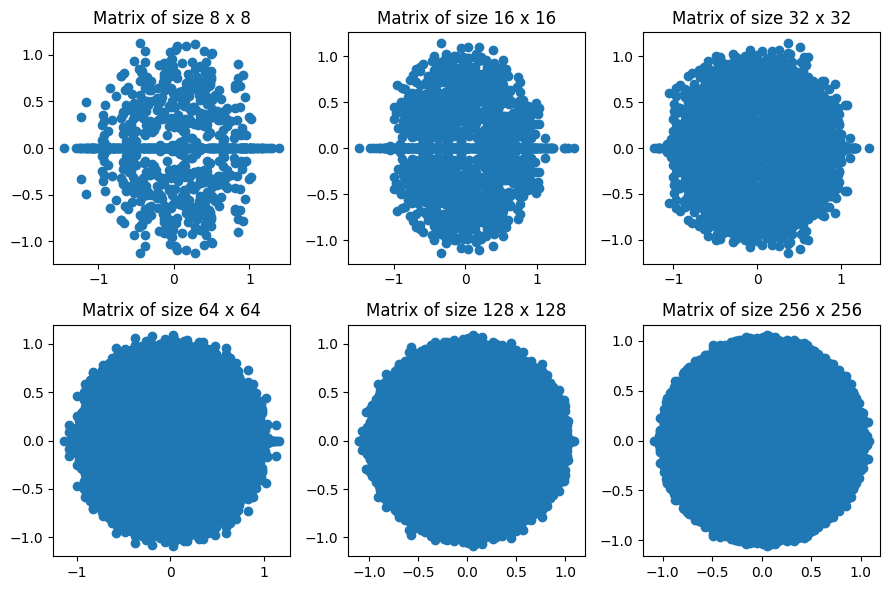

In [108]:
# Plot the results
fig, ax = plt.subplots(2, 3, figsize=(9, 6))
iter = 0
for i in range(2):
    for j in range(3):
        mat_size = 2**(iter+3)
        xs = rand_eigs_coords_dict[mat_size][0]
        ys = rand_eigs_coords_dict[mat_size][1]
        ax[i, j].scatter(xs, ys)
        ax[i, j].set_title(f"Matrix of size {mat_size} x {mat_size}")
        iter += 1
fig.tight_layout()
plt.show()

The plots suggest that, as the size of the random matrix increases, the eigenvalues will fill in the unit circle in the complex plane. The spectral radius of a random matrix approaches 1 as $m \to \infty$.

**(b)** What about norms? How does the 2-norm of a random matrix behave as $m \to \infty$? Of course we must have $\rho (A) \leq \begin{Vmatrix} A \end{Vmatrix}$. Does this inequality appear to approach an equality as $m \to \infty$?

In [121]:
# Compute the 2-norms for the sets of 100 matrices for matrix size 8, 16, 32, 64, 128, 256, respectively.
two_norms_dict = {idx: [np.linalg.norm(mat) for mat in rand_mats_100(idx)] for idx in powers_of_two}

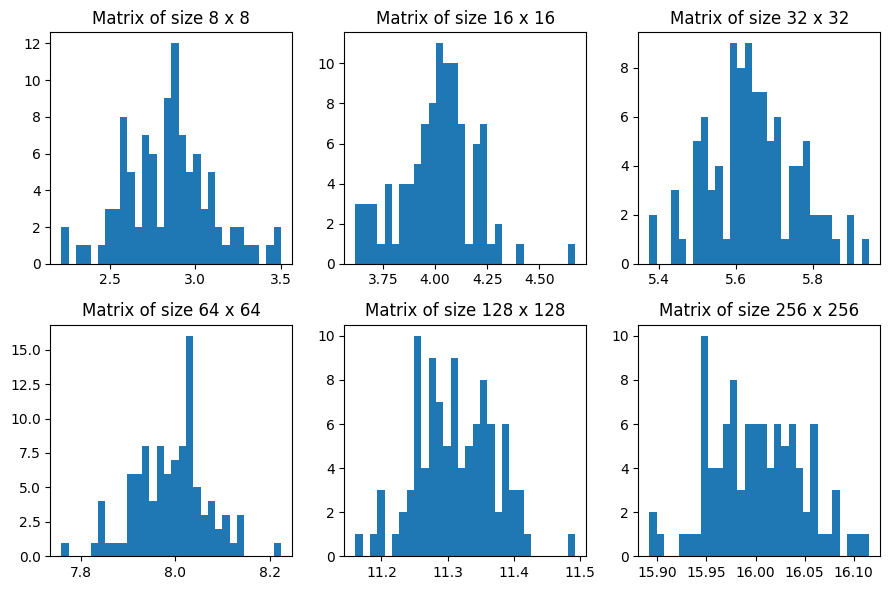

In [137]:
# Plot histograms for the 2-norms for each size matrix
fig, ax = plt.subplots(2, 3, figsize=(9, 6))
iter = 0
for i in range(2):
    for j in range(3):
        mat_size = 2**(iter+3)
        xs = two_norms_dict[mat_size]
        ax[i, j].hist(xs, bins=30)
        ax[i, j].set_title(f"Matrix of size {mat_size} x {mat_size}")
        iter += 1
fig.tight_layout()
plt.show()

The distribution of the two-norms in the figure above appear to have more or less the same shape, but the distribution is shifting right as $m$ increases. 

**(c)** What about condition numbers--or more simply, the smallest singular value $\sigma_{min}$? Even for fixed $m$ this question is interesting. What proportion of random matrices in $\mathbb{R}^{m \times m}$ seem to have $\sigma_{min} \leq 2^{-1}, 4^{-1}, 8^{-1}, \dots $? In other words, what does the tail of the probability distibution of smallest singular values look like? How does this scale  of all this change with $m$?

In [147]:
# Compute the minimum singular value for the sets of 100 matrices for matrix size 8, 16, 32, 64, 128, 256, respectively.
min_sv_dict = {idx: [min(np.linalg.svd(mat)[1]) for mat in rand_mats_100(idx)] for idx in powers_of_two}

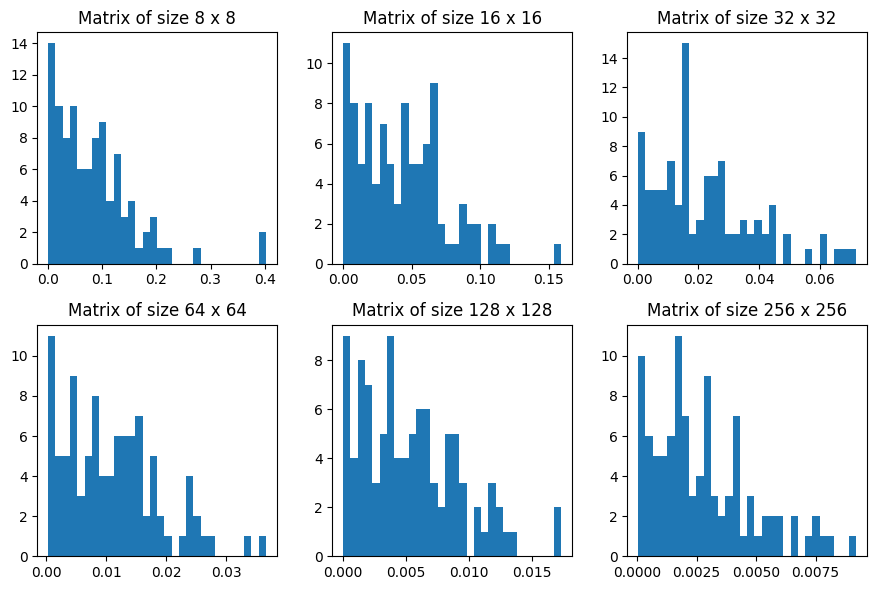

In [148]:
# Plot histograms for the minimum singular values for each size matrix
fig, ax = plt.subplots(2, 3, figsize=(9, 6))
iter = 0
for i in range(2):
    for j in range(3):
        mat_size = 2**(iter+3)
        xs = min_sv_dict[mat_size]
        ax[i, j].hist(xs, bins=30)
        ax[i, j].set_title(f"Matrix of size {mat_size} x {mat_size}")
        iter += 1
fig.tight_layout()
plt.show()

The distribution of singular values seems to be shifting left as $m$ increases. The proportion of random matrices in $\mathbb{R}^{m \times m}$ that seem to have $\sigma_{min} \leq 2^{-1}, 4^{-1}, 8^{-1}, \dots $ appears to be 1 in the limit as $m \to \infty$.

**(d)** How do the answers to (a)-(c) change if we consider random triangular instead of full matrices, i.e., upper-triangular matrices whose entries are samples from the same distribution as above?

In [149]:
def rand_mats_100(m):
    # Output 100 random upper triangular matrices of dim m x m
    return [np.triu(np.random.normal(loc=0.0, scale=1/np.sqrt(m), size=(m, m))) for i in range(100)]

In [155]:
# compute the eigen-values for 100 random upper triangluar matrices each for matrix sizes 8, 16, 32, 64, 128, 256 and
# format the results into x and y vectors for plotting for plotting
rand_eigs_dict = {idx: np.linalg.eigvals(rand_mats_100(idx)).flatten() for idx in powers_of_two}
rand_eigs_flat_dict = {idx: np.unique(vals.flatten()) for idx, vals in rand_eigs_dict.items()}


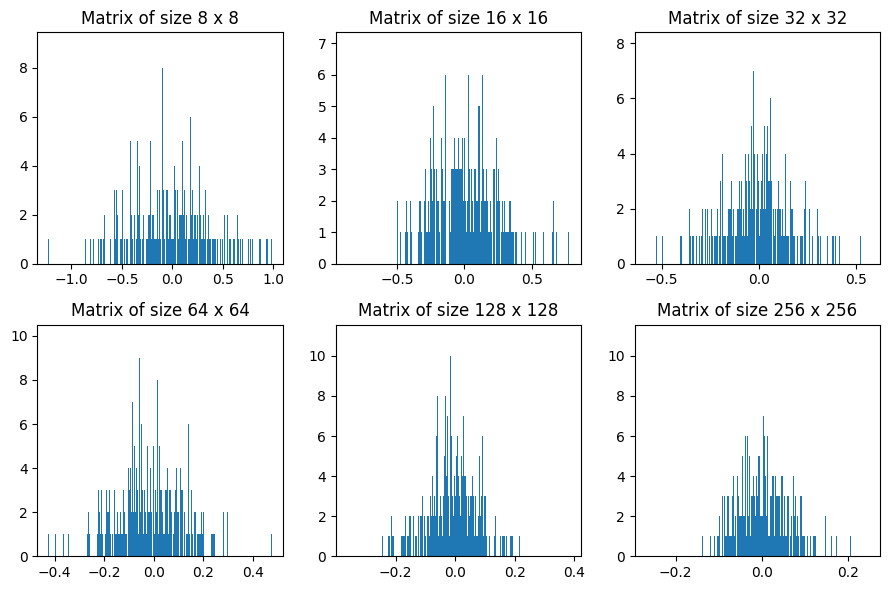

In [160]:
# Plot the results
fig, ax = plt.subplots(2, 3, figsize=(9, 6))
iter = 0
for i in range(2):
    for j in range(3):
        mat_size = 2**(iter+3)
        xs = rand_eigs_flat_dict[mat_size]
        # ys = rand_eigs_coords_dict[mat_size][1]
        ax[i, j].hist(xs, len(xs), )
        ax[i, j].set_title(f"Matrix of size {mat_size} x {mat_size}")
        iter += 1
fig.tight_layout()
plt.show()

Here the distribution does not appear to change as the size of the random upper triangular matrices increase.

In [162]:
# Compute the 2-norms for the sets of 100 matrices for matrix size 8, 16, 32, 64, 128, 256, respectively.
two_norms_dict = {idx: [np.linalg.norm(mat) for mat in np.triu(rand_mats_100(idx))] for idx in powers_of_two}

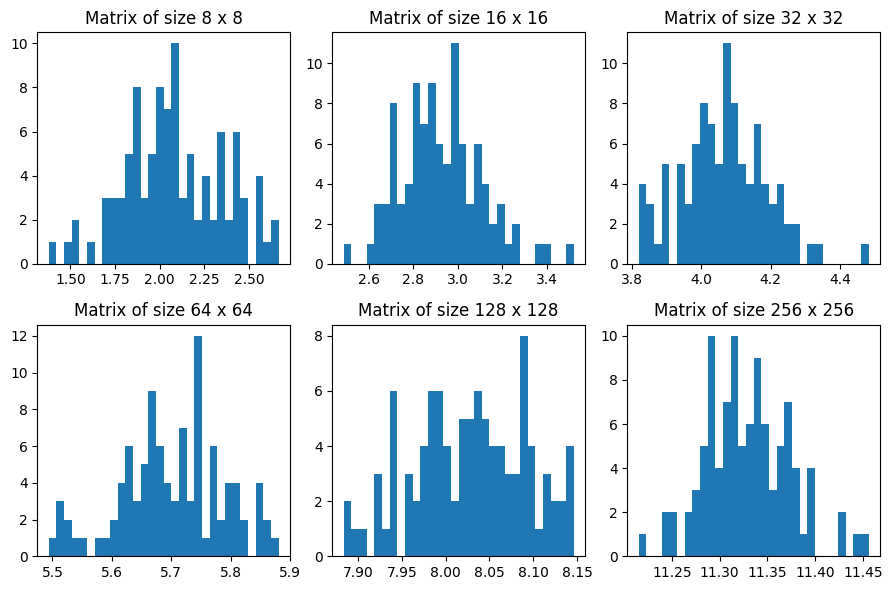

In [163]:
# Plot histograms for the 2-norms for each size matrix
fig, ax = plt.subplots(2, 3, figsize=(9, 6))
iter = 0
for i in range(2):
    for j in range(3):
        mat_size = 2**(iter+3)
        xs = two_norms_dict[mat_size]
        ax[i, j].hist(xs, bins=30)
        ax[i, j].set_title(f"Matrix of size {mat_size} x {mat_size}")
        iter += 1
fig.tight_layout()
plt.show()

Here the distribution of two-norms for random upper triangular matrices seems to shift right, as it did in the case of full random matrices.

In [165]:
# Compute the minimum singular value for the sets of 100 random upper triangular matrices for matrix size 8, 16, 32, 64, 128, 256, respectively.
min_sv_dict = {idx: [min(np.linalg.svd(mat)[1]) for mat in np.triu(rand_mats_100(idx))] for idx in powers_of_two}

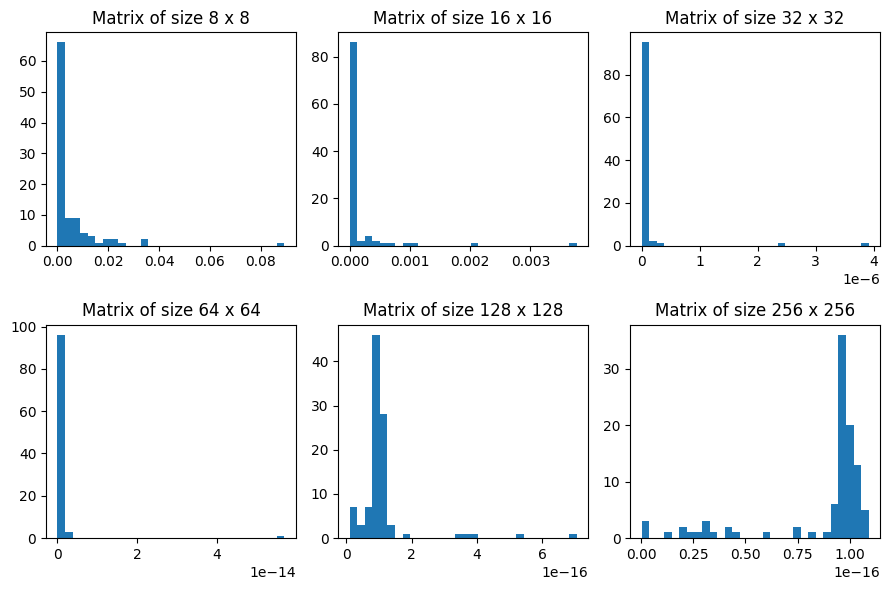

In [166]:
# Plot histograms for the minimum singular values for each size matrix
fig, ax = plt.subplots(2, 3, figsize=(9, 6))
iter = 0
for i in range(2):
    for j in range(3):
        mat_size = 2**(iter+3)
        xs = min_sv_dict[mat_size]
        ax[i, j].hist(xs, bins=30)
        ax[i, j].set_title(f"Matrix of size {mat_size} x {mat_size}")
        iter += 1
fig.tight_layout()
plt.show()

For random upper diagonal matrices the distribution of minimum singular values seems to shift right intsead of left as $m \to \infty$.